In [6]:
from src.NeuralNetwork import NeuralNetwork

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import random

In [7]:
def define_train_test(df):

    d_label = df[6].unique()

    d_target = []
    for i in reversed(range(d_label.size)):
        aux = []
        for j in reversed(range(d_label.size)):
            if(i == j): aux.append(1)
            else: aux.append(0)
        d_target.append( [aux, d_label[i]] )

    x_dh_aux = df.loc[df[6] == d_label[0], 0:5].values
    x_sl_aux = df.loc[df[6] == d_label[1], 0:5].values
    x_no_aux = df.loc[df[6] == d_label[2], 0:5].values

    x_dh = []
    for i in range(len(x_dh_aux)):
        x_dh.append([x_dh_aux[i], 'DH'])
    
    x_sl = []
    for i in range(len(x_sl_aux)):
        x_sl.append([x_sl_aux[i], 'SL'])
    
    x_no = []
    for i in range(len(x_no_aux)):
        x_no.append([x_no_aux[i], 'NO'])
    
    x_total = []
    x_total.extend(x_dh)
    x_total.extend(x_sl)
    x_total.extend(x_no)
    random.shuffle(x_total)

    size_train = int(len(x_total) * 0.7)

    x_test = []
    x_train = []
    x_train = x_total[:size_train]
    x_test = x_total[size_train:]

    return x_train, x_test, d_target

weight_step = Matrix([[8.15249654930173, -142.891939689416, 39.3469310248261, 152.016791653759, 239.639805662584, -923.777957605495], [111.838034290340, 31.9393443104218, 81.6385516227514, 80.8939459103377, -292.290016226439, 1006.77063996880], [-124.066638990294, 191.229516300809, -266.604319009598, -314.409738639141, 62.1634110164208, -465.445990371033]])
bias_step = Matrix([[-1.20547899897786], [-1.66418926368058], [4.93662311756104]])
correct_step = 53
correct_rate_step = 56.98924731182796


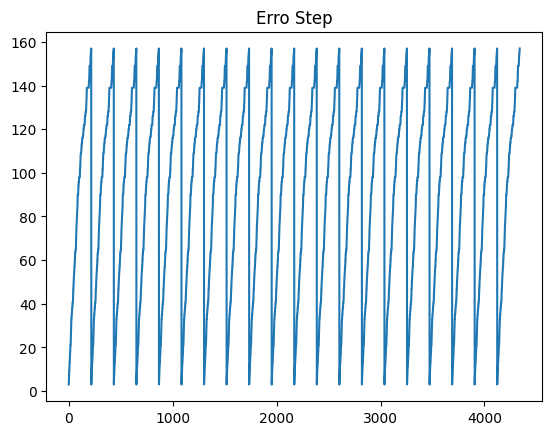



weight_sigmoid = Matrix([[-36.3855263864368, -228.854265168740, 96.8356433372404, 192.618458755243, 426.964037207239, -806.689595233278], [205.438026529094, 37.5635799716955, 195.812689457671, 167.953399632517, -325.348420490606, 1161.99558842725], [-166.874397663015, 192.797409814623, -291.189926588079, -359.105134185303, -100.007567894640, -353.935932405101]])
bias_sigmoid = Matrix([[0.237042313938911], [-1.72186426338780], [2.10893595472979]])
correct_sigmoid = 61
correct_rate_sigmoid = 65.59139784946237


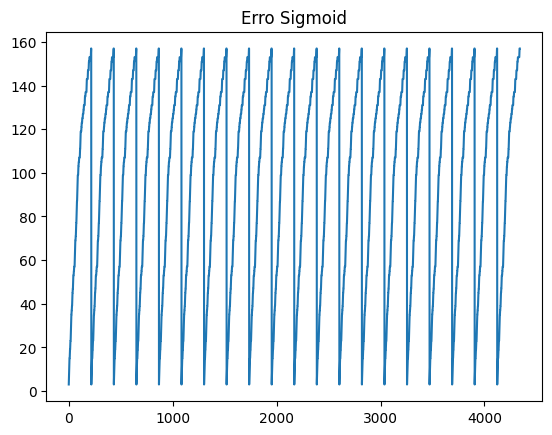

In [9]:
df_path = 'data/'
df = pd.read_csv(df_path + 'column_3C.dat', sep=' ', header=None)
# print(df)
x_train, x_test, d_target = define_train_test(df)

rna = NeuralNetwork(0.1)

weight_step, bias_step, err_step  = rna.perceptron_step(20, x_train, d_target)
print('weight_step = ' + str(weight_step))
print('bias_step = ' + str(bias_step))
correct_step, correct_rate_step = rna.perceptron_test_step(x_test, d_target, weight_step, bias_step)
print('correct_step = ' + str(correct_step))
print('correct_rate_step = ' + str(correct_rate_step))

plt.plot(err_step, label='Erro')
plt.title('Erro Step')
plt.show()


print('\n')

weight_sigmoid, bias_sigmoid, err_sigmoid = rna.perceptron_sigmoid(20, x_train, d_target)
print('weight_sigmoid = ' + str(weight_sigmoid))
print('bias_sigmoid = ' + str(bias_sigmoid))
correct_sigmoid, correct_rate_sigmoid = rna.perceptron_test_sigmoid(x_test, d_target, weight_sigmoid, bias_sigmoid)
print('correct_sigmoid = ' + str(correct_sigmoid))
print('correct_rate_sigmoid = ' + str(correct_rate_sigmoid))

plt.plot(err_sigmoid, label='Erro')
plt.title('Erro Sigmoid')
plt.show()